In [34]:
import mlc_func
import elf
import numpy as np

In [90]:
def build_energy_mlcf(feature_src, target_src):
    if not len(feature_src) == len(target_src):
        raise Exception('Please provided onle target location for each feature set')
        
    sets = []
    
    species_dict = {'o':0, 'h' : 1}
    for fsrc, tsrc in zip(feature_src, target_src):
        elfs = elf.utils.hdf5_to_elfs(fsrc,
                              grouped = True, values_only = True)
        targets = np.genfromtxt(tsrc, delimiter = ',')
        subnets = []
        for species in elfs:
            subnets.append(mlc_func.Subnet())
            feat = np.array(elfs[species])
            subnets[-1].add_datasets([mlc_func.Dataset(feat, species,0,feat.shape[1])], targets, processed = True)
        sets.append(subnets)
    return mlc_func.Network(sets)

In [91]:
basepath_feat = '../../ElF/data/revPBE/elfs/basis_default_elf/'
basepath_tar = '../../ElF/data/revPBE/'

systems = ['monomers','dimers','trimers']

feature_src = [basepath_feat + s +'_processed.hdf5' for s in systems]
target_src = [basepath_tar +'/' + s +'/energies.dat' for s in systems]

nn = build_energy_mlcf(feature_src, target_src)


{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}
{'r_o_o': 0.9, 'r_i_o': 0.05, 'n_rad_o': 2, 'n_l_o': 3, 'gamma_o': 0, 'r_i_h': 0.0, 'r_o_h': 1.35, 'n_rad_h': 2, 'n_l_h': 2, 'gamma_h': 0}


In [92]:
nn.train(step_size=0.01, max_steps= 20000 ,b_=[1e-8, 1e-8], optimizer=None, adaptive_rate = False)

multipliers: [1.0, 1.0, 1.0]
Step: 0
Training set loss:
0: 471.7661437988281
1: 943.511962890625
2: 1415.8065185546875
Total: 1765.5838623046875
Validation set loss:
0: 471.7081604003906
1: 943.6043701171875
2: 1415.80859375
Total: 1765.6192626953125
--------------------
L2-loss: 1.8021601135842502e-06
Step: 2000
Training set loss:
0: 0.33634889125823975
1: 0.6757757663726807
2: 0.5832145810127258
Total: 0.953909158706665
Validation set loss:
0: 0.42239904403686523
1: 0.5356603860855103
2: 0.6292476058006287
Total: 0.9280655384063721
--------------------
L2-loss: 3.0818525829090504e-06


KeyboardInterrupt: 

In [93]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


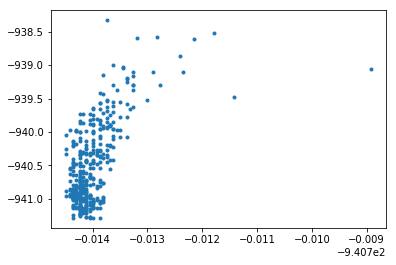

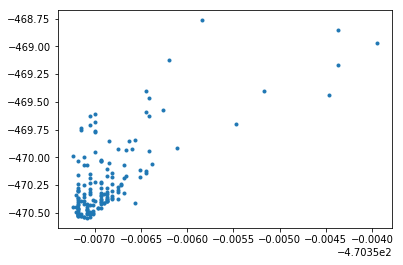

In [94]:
plot(nn.get_logits(which='test')[1], nn.subnets[1][0].y_test, ls = '', marker = '.')
figure()
plot(nn.get_logits(which='test')[0], nn.subnets[0][0].y_test, ls = '', marker = '.')